## CPE 019 - Assignment 10.2 - ARIMA Model


**Names:** SERRANO, Jio A.<br>
**Course and Section:** CPE019 - CPE32S3 <br>
**Date of Submission**: May 4, 2024<br>
**Instructor:** Engr. Roman Richard<br>


### Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datapath = '/content/drive/MyDrive/HOA 10/data.csv'

### Visualizing Time Series

<ipython-input-11-4ab4bb12d738>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv(datapath, header=0, parse_dates=[0], index_col=0, date_parser=parser)


            CO2 (ppm)
Month                
1965-01-01     319.32
1965-02-01     320.36
1965-03-01     320.82
1965-04-01     322.06
1965-05-01     322.17


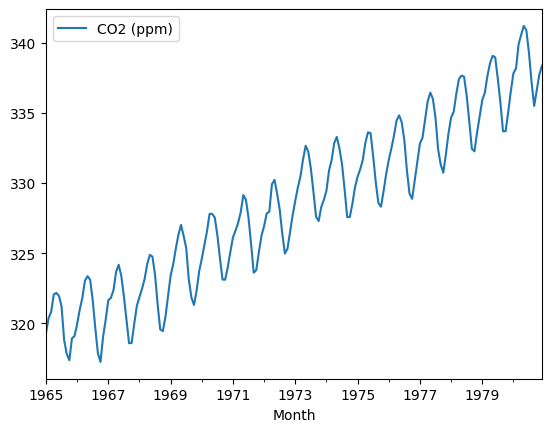

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
import datetime


def parser(x):
	return datetime.datetime.strptime(x, '%Y-%m')

series = read_csv(datapath, header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()


**Remarks**: Plotting the data generated the graph above. Observing the graph gives us an idea that an upward trend is visible in the given time-series data.

#### Autocorrelation Plot

<ipython-input-12-8bb897f38bec>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv(datapath, header=0, parse_dates=[0], index_col=0, date_parser=parser)


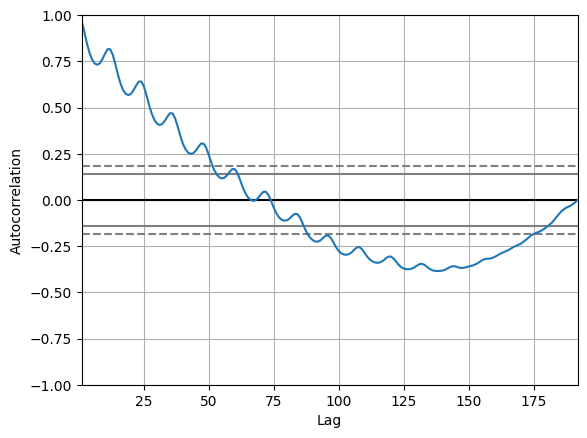

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.datetime.strptime(x, '%Y-%m')

series = read_csv(datapath, header=0, parse_dates=[0], index_col=0, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()


**Remarks**: The graph above shows a varying correlation of the data and the lags. In an autocorrelation plot, the data is being correlated with lags, or previous data points [1]. We also see horizontal lines which represent the confidence intervals that show statistically significant correlations [2], more reliable data are placed outside the confidence interval.

[1] J. Brownlee, “A Gentle Introduction to Autocorrelation and Partial Autocorrelation - MachineLearningMastery.com,” MachineLearningMastery.com, Feb. 05, 2017. https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/ (accessed Apr. 30, 2024).
‌

[2] “pandas.plotting.autocorrelation_plot — pandas 2.2.2 documentation,” Pydata.org, 2024. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.autocorrelation_plot.html (accessed Apr. 30, 2024).
‌

### Fitting an ARIMA Model (Baseline Model Order = (1, 1, 1))

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# load dataset
def parser(x):
	return datetime.datetime.strptime(x, '%Y-%m')

series = read_csv(datapath, header=0, index_col=0, parse_dates=True, date_parser=parser)
series.squeeze
series.index = series.index.to_period('M')

# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()


<ipython-input-39-171d242dbbcf>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv(datapath, header=0, index_col=0, parse_dates=True, date_parser=parser)


**Remarks**: The above code fits an ARIMA model with a baseline model order of (1, 1, 1) to the given time series data. According to [3], [4], the baseline order model indicates:
* AR (1): one autoregressive term (uses previous value)
* I (1): one differencing term
* MA (1): one moving average term

[3] Hyndman, R. J., & Athanasopoulos, G. (2013). Forecasting: principles and practice (2nd ed.). OTexts. [This is a comprehensive resource on forecasting methods, including ARIMA]


[4] Brockwell, P. J., & Davis, R. A. (2016). Introduction to time series and forecasting (3rd ed.). Springer. (Another good reference for ARIMA models and their properties)



In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Thu, 02 May 2024   AIC                            457.638
Time:                        16:10:05   BIC                            467.395
Sample:                    01-31-1965   HQIC                           461.590
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

**Remarks**: The results above show a summary of the model being created. This includes the dependent variable, which is the CO2 in ppm, the number of instances or observations in the given dataset and among other variables. Here are a brief explanation of some of the variables present in the results [5], [6]:

* ***Model***: The specific ARIMA model used which has AR, I, MA values of 1, 1, 1 respectively.

* ***Log Likelihood***: Tells us how good the model fits the data, a higher value is more preferred. Based on the result, the model does not really fit the data nicely.

* ***Sample***: Tells the time period of the model, in our case, 1965 to 1980

* ***Covariance Type***: Tells us the method used to estimate the error variance present in the model

We also have the **coefficient estimates** which are in the second section composed ot ar.L1, ma.L1, and sigma2.

And for the last section, we have the diagnosttic tests which tell statistical information about the residuals of the model. These include:

* ***Ljung-Box*** for serial dependence in the residuals,
* ***Jarque-Bera*** for the normality of the residuals
* ***Heteroskedasticity*** for the non-constant variance in the residuals
* ***Skew*** which tells us the shape of the residual distribution.

[5] Hyndman, R. J., & Athanasopoulos, G. (2013). Forecasting: principles and practice (2nd ed.). https://otexts.com/fpp3/

[6] Brockwell, P. J., & Davis, R. A. (2009). Time series: theory and methods (Vol. 89). Springer Science & Business Media. https://link.springer.com/book/10.1007/978-1-4419-0320-4




#### Line Plot of Residuals

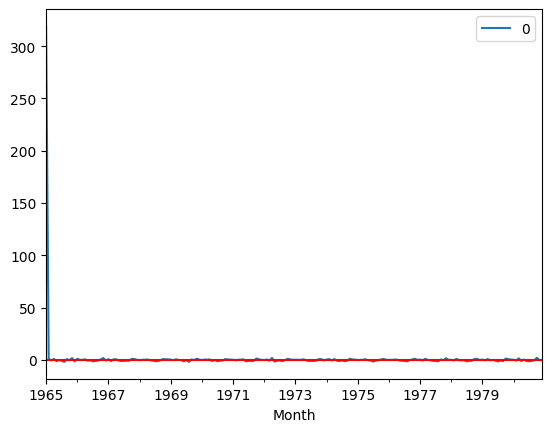

In [ ]:
# Plotting line plot of residuals

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.axhline(y=0, color ='r')
pyplot.show()

#### Density Plot of Residuals

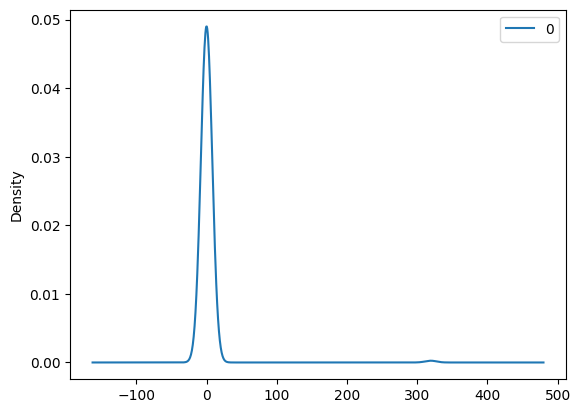

In [ ]:
residuals.plot(kind='kde')
pyplot.show()


**Remarks**: The density plot of the residuals above resemble a perfect bell-shape with balance on both its left and right sides, this is indicative that the residuals follow a normal distribution [8].

[8] Z. Bobbitt, “How to Create a Residual Plot in R - Statology,” Statology, Apr. 06, 2020. https://www.statology.org/residual-plot-r/ (accessed May 02, 2024).
‌

#### Summary of Residuals

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  192.000000
mean     1.698162
std     23.055889
min     -1.760398
25%     -0.571139
50%      0.034938
75%      0.566208
max    319.320000


**Remarks**: The summary of the residuals are displayed above. One indicator of the presence of bias in the model's prediction is the value of the **mean** in the above results. A non-zero value indicates the presence of a bias [7]. Based on our results, the value is relatively small, meaning, only a slight bias is present in the model's predictions.

[7] Montgomery, D. C., & Myers, R. H. (2022). Response surface methodology: product and process optimization (4th ed.). John Wiley & Sons. (This is a standard text on regression analysis and provides a good general reference for interpreting residuals)

### Improving the ARIMA Model

In this section, we will try to improve the ARIMA model by varying the baseline model order of (1, 1, 1)..

#### Baseline Model Order = (1, 2, 3)

In [ ]:
model2 = ARIMA(series, order=(1,2,3))
model_fit2 = model2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


#### Baseline Model Order = (2, 4, 6)

In [ ]:
model3 = ARIMA(series, order=(2,4,6))
model_fit3 = model3.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Printing Model Summary

#### Model Order = (1, 2, 3)

In [ ]:
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -215.841
Date:                Thu, 02 May 2024   AIC                            441.682
Time:                        16:10:12   BIC                            457.917
Sample:                    01-31-1965   HQIC                           448.259
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3829      0.140      2.726      0.006       0.108       0.658
ma.L1         -0.4703     21.456     -0.022      0.983     -42.523      41.582
ma.L2         -0.1176     11.310     -0.010      0.9

##### Residuals Results

In [ ]:
residuals2 = DataFrame(model_fit2.resid)
print(residuals2.describe())

                0
count  192.000000
mean     0.824050
std     25.796585
min   -158.620066
25%     -0.567039
50%     -0.065353
75%      0.453394
max    319.320000


**Remarks**: Varying the baseline model order values has decreased the value of mean in the `residuals2.describe()` function. As stated earlier, a value closer to 0 is more preferable as this indicates that there are no biases present in the model's predictions.

#### Model Order = (2, 4, 6)

In [ ]:
print(model_fit3.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(2, 4, 6)   Log Likelihood                -238.903
Date:                Thu, 02 May 2024   AIC                            495.805
Time:                        16:10:14   BIC                            524.933
Sample:                    01-31-1965   HQIC                           507.607
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7257      0.021    -81.244      0.000      -1.767      -1.684
ar.L2         -0.9656      0.022    -42.957      0.000      -1.010      -0.922
ma.L1          0.1079      0.438      0.246      0.8

##### Residuals Results

In [ ]:
residuals3 = DataFrame(model_fit3.resid)
print(residuals3.describe())

                0
count  192.000000
mean    -0.097497
std     43.155370
min   -477.940270
25%     -0.548752
50%     -0.133023
75%      0.492419
max    319.320000


**Remarks**: As we can see from the results of the `describe()` function above, the value of the mean value has become closer to 0. However, observing the results, we also see that the gap between themix and max values had widen as well, this indicates the presence of outliers which could be a concern.

### Making a Forecast (Steps = 10)

In this section we will be creating a function that will accept four parameters: the `data` itself, and the values for the ARIMA model, `p`, `q`, and `d`. This function will return the `forecast` variable.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
def make_forecast(data, p, q, d):
  # Splitting into train and test sets
  train_size = int(len(data) * 0.75)
  train_data, test_data = data[0:train_size], data[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1
  model = ARIMA(train_data, order = (p, q, d))
  results = model.fit()
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  forecast = results.predict(len(data), len(data)+10, typ = 'levels')

  return predictions, forecast

In [ ]:
predictions, forecast = make_forecast(series, 1, 2, 3)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
print("Forecast (Steps = 10)")
print(forecast)

Forecast (Steps = 10)
1981-01    338.082401
1981-02    338.186523
1981-03    338.290645
1981-04    338.394767
1981-05    338.498889
1981-06    338.603011
1981-07    338.707133
1981-08    338.811255
1981-09    338.915377
1981-10    339.019499
1981-11    339.123621
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  4.276197138168512
RMSE:  2.0678967909855928


**Remarks**: The MSE and RMSE values indicate the difference between the test values and the predictions made by the model. A lower value indicates better results.

### Plotting the Forecast

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

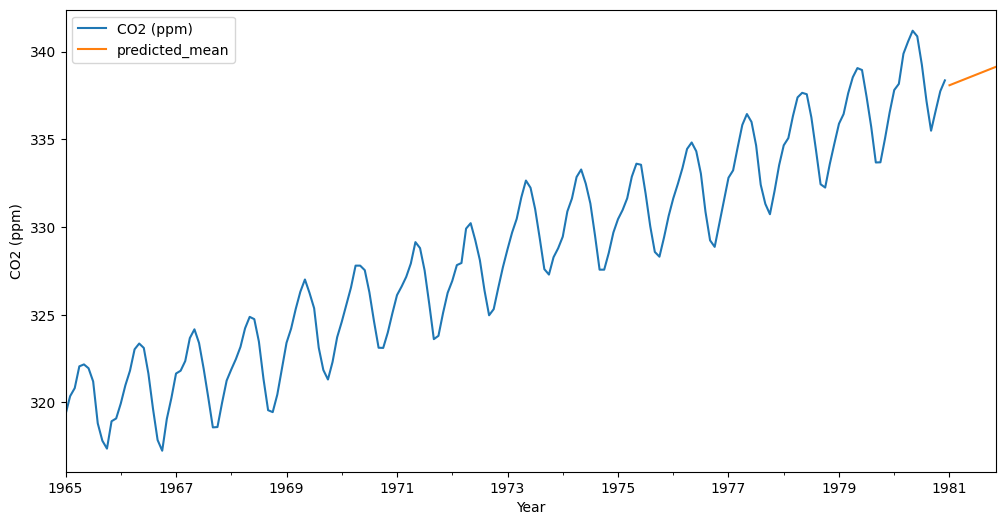

In [ ]:
ylabel='CO2 (ppm)'
xlabel='Year'

ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

**Remarks**: We have used the baseline model to perform the forecasting, as we can see in the resulting plot of the forecast, the forecasted values do not really fit the pattern that was set in the previous data points. Later on, we will be performing a grid search in order to find the best values for the baseline model order of the ARIMA model.

##### Plotting Actual and Predicted Values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-66-a6ef4e28fe01>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=332.480967, expected=332.810000
predicted=333.563145, expected=333.230000
predicted=333.430752, expected=334.550000
predicted=335.584076, expected=335.820000
predicted=336.964647, expected=336.440000
predicted=336.611833, expected=335.990000
predicted=335.381202, expected=334.650000
predicted=333.559572, expected=332.410000
predicted=330.660036, expected=331.320000
predicted=330.775737, expected=330.730000
predicted=330.743269, expected=332.050000
predicted=333.264397, expected=333.530000
predicted=334.860784, expected=334.660000
predicted=335.217887, expected=335.070000
predicted=335.160414, expected=336.330000
predicted=337.437765, expected=337.390000
predicted=338.342152, expected=337.650000
predicted=337.482445, expected=337.570000
predicted=337.399132, expected=336.250000
predicted=335.249107, expected=334.390000
predicted=332.804083, expected=332.440000
predicted=331.140044, expected=332.250000
predicted=332.615317, expected=333.590000
predicted=335.104500, expected=334

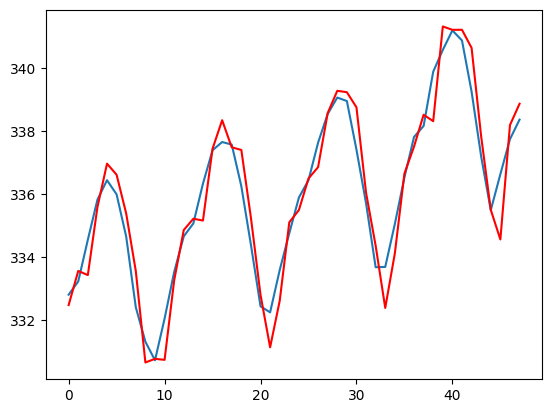

In [ ]:
train_size = int(len(series.values) * 0.75)
train_data, test_data = series.values[0:train_size], series.values[train_size:]
history = [x for x in train_data]
predictions = list()

for t in range(len(test_data)):
	model = ARIMA(history, order=(1,2,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test_data[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test_data)
pyplot.plot(predictions, color='red')
pyplot.show()

**Remarks**: Studying the results obtained above, we can see that the values obtained by the model that we have created (red) are not that different from the actual values (blue). However, the lower values in the graph are not captured well. The RMSE value obtained for the testing data of this model is **0.776**.

### Performing a Grid Search

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(series) * 0.75)
  train_data, test_data = series[0:train_size], series[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(series), len(series)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.084
ARIMA(1, 3, 1) MSE=1087.634
ARIMA(1, 3, 2) MSE=1026.289
ARIMA(1, 3, 3) MSE=1016.551
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.992
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

**Remarks**: Based on the result of the grid search above, the best values for the ARIMA model that will be used on the given dataset are 9, 2, 0.

#### Trying the (9, 2, 0) values for the ARIMA model.

In [ ]:
predictions2, forecast2 = make_forecast(series, 9, 2, 0)

In [ ]:
print("Forecast (Steps = 10)")
print(forecast2)

Forecast (Steps = 10)
1981-01    338.829450
1981-02    339.410077
1981-03    339.846441
1981-04    339.951027
1981-05    339.624439
1981-06    338.996781
1981-07    338.387871
1981-08    338.097810
1981-09    338.219246
1981-10    338.635268
1981-11    339.168786
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

print("MSE: ", mean_squared_error(test_data, predictions2))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions2)))

MSE:  1.1498843083979555
RMSE:  1.0723265866320557


**Remarks**: Compared to the original testing of the ARIMA model with (1, 2, 3) model order, the current model, ARIMA(9, 2, 0) gave us lower MSE and RMSE values which is ideal.

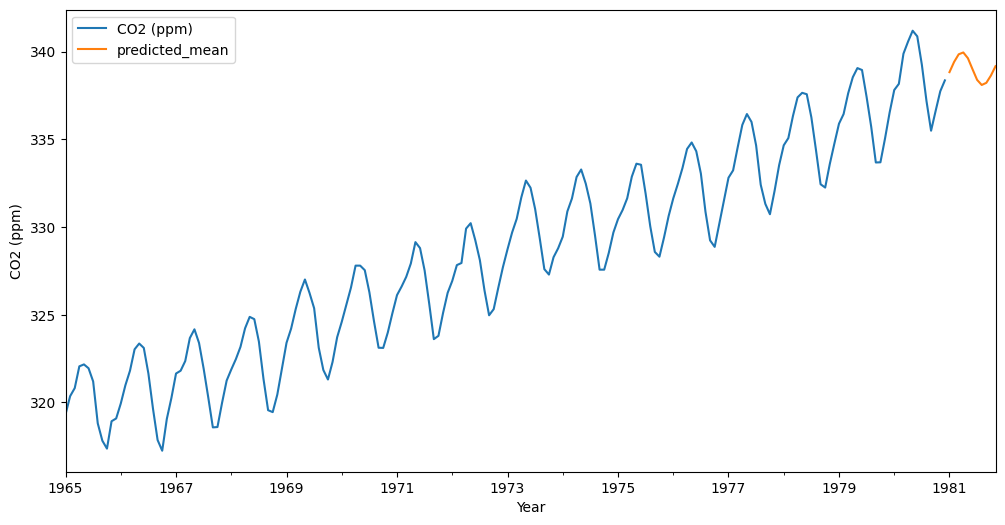

In [ ]:
ylabel='CO2 (ppm)'
xlabel='Year'

ax = series.plot(legend=True,figsize=(12,6))
forecast2.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

**Remarks**: With the new values of the ARIMA model, we can see that the plot of the forecasted values (in orange) fit the trend of the graph better. A side-by-side comparison is shown in the image below to clearly see the difference.

<ipython-input-65-16d12efa2af4>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=332.971920, expected=332.810000
predicted=333.747864, expected=333.230000
predicted=333.396907, expected=334.550000
predicted=335.660578, expected=335.820000
predicted=336.918557, expected=336.440000
predicted=336.078668, expected=335.990000
predicted=334.210415, expected=334.650000
predicted=332.995495, expected=332.410000
predicted=331.263600, expected=331.320000
predicted=331.441763, expected=330.730000
predicted=331.004100, expected=332.050000
predicted=333.188020, expected=333.530000
predicted=335.166427, expected=334.660000
predicted=335.725172, expected=335.070000
predicted=335.419671, expected=336.330000
predicted=337.285280, expected=337.390000
predicted=338.206525, expected=337.650000
predicted=337.139162, expected=337.570000
predicted=336.212784, expected=336.250000
predicted=334.632933, expected=334.390000
predicted=333.562359, expected=332.440000
predicted=331.834844, expected=332.250000
predicted=332.505842, expected=333.590000
predicted=335.195587, expected=334

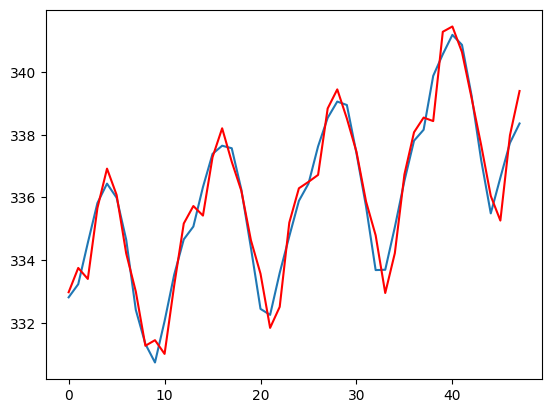

In [ ]:
train_size = int(len(series.values) * 0.75)
train_data, test_data = series.values[0:train_size], series.values[train_size:]
history = [x for x in train_data]
predictions = list()

for t in range(len(test_data)):
	model = ARIMA(history, order=(9,2,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test_data[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test_data)
pyplot.plot(predictions, color='red')
pyplot.show()

**Remarks**: Compared to the ARIMA(1, 2, 3) model, the ARIMA(9, 2, 0) obtained a slightly lower RMSE value of **0.637** for the testing dataset. This is indicative that the actual values are a bit closer here in this model compared to the prior model.

#### Side-by-Side Comparison

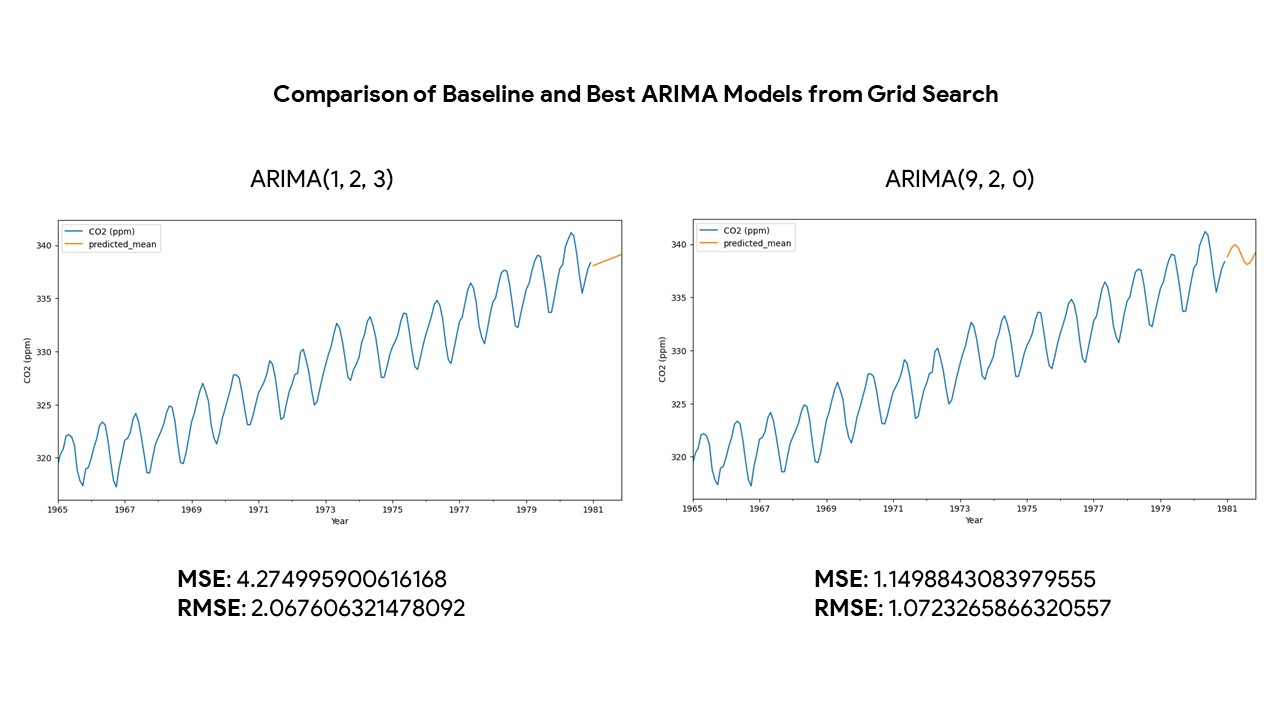

**Remarks**: Based on the comparison above, we can observe lower MSE and RMSE values in the best ARIMA model obtained from the grid search performed prior compared to the baseline ARIMA model. We can also clearly see that the predicted values of the best ARIMA model fit the pattern of the time-series data better.

## Supplementary Activity

This section contains the processing of the temperature dataset similar to what has been done above.

### Loading the Data

In [ ]:
temperatureDataPath = '/content/drive/MyDrive/HOA 10/dataset_temperature.csv'

### Visualizing Time Series

<ipython-input-68-70494555f64b>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv(temperatureDataPath, header=0, parse_dates=[0], index_col=0, date_parser=parser)


            Mean monthly temperature
Month                               
1907-01-01                      33.3
1907-02-01                      46.0
1907-03-01                      43.0
1907-04-01                      55.0
1907-05-01                      51.8


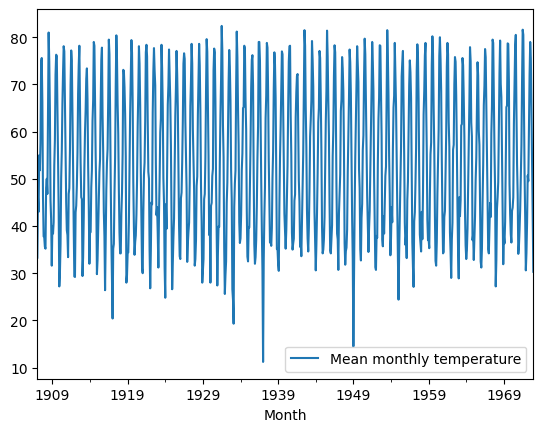

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
import datetime


def parser(x):
	return datetime.datetime.strptime(x, '%Y-%m')

series = read_csv(temperatureDataPath, header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()


**Remarks**: Visualizing the time-series dataset tells us that the underlying pattern of the data points is them being put back and forth, high and low every month. Based on the graph, the values do not necessarily project an upward trend but rather, just an alternation from high and low values.

#### Autocorrelation Plot

<ipython-input-69-2fdda5cdc430>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv(temperatureDataPath, header=0, parse_dates=[0], index_col=0, date_parser=parser)


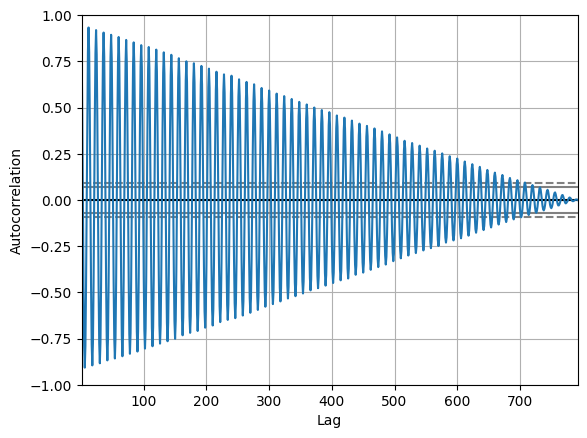

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.datetime.strptime(x, '%Y-%m')

series = read_csv(temperatureDataPath, header=0, parse_dates=[0], index_col=0, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()


**Remarks**: The autocorrelation plot above tells us the strength of correlation that exists between the current data point and a previous data point [2]. As we can see, as the lag increases, the correlation strength between it and the current data point decreases until it reaches no correlation (closer to 0). The correlation value is indicated in the y-axis of the graph, and observing it, we can see that the correlation of the lags and the current data point fluctuates from positive to negative correlation.
‌

### Fitting an ARIMA Model (Baseline Model Order = (1, 1, 1))

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# load dataset
def parser(x):
	return datetime.datetime.strptime(x, '%Y-%m')

series = read_csv(temperatureDataPath, header=0, index_col=0, parse_dates=True, date_parser=parser)
series.squeeze
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()


<ipython-input-70-e665acd4f447>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv(temperatureDataPath, header=0, index_col=0, parse_dates=True, date_parser=parser)


**Remarks**: For the baseline ARIMA model, we are usingg the (1, 1, 1) p, q, and d values.



In [ ]:
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2773.596
Date:                      Thu, 02 May 2024   AIC                           5553.192
Time:                              16:23:10   BIC                           5567.212
Sample:                          01-31-1907   HQIC                          5558.581
                               - 12-31-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462      0.644      -0.174       0.108
sigm

**Remarks**: The same results summary as the one done in the procedure was obtained in this part. As we can see, we have a very low **log likelihood** value, which tells us that the model poorly fits the given dataset.

#### Line Plot of Residuals

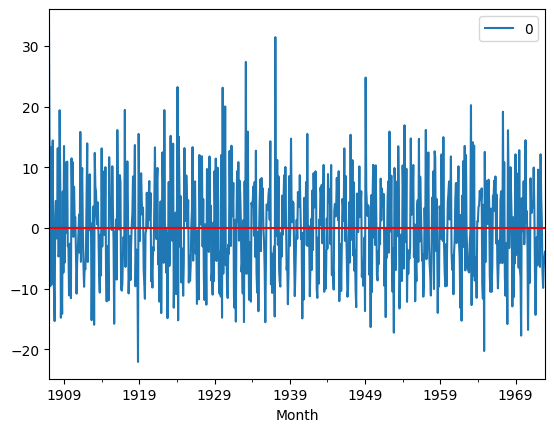

In [ ]:
# Plotting line plot of residuals

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.axhline(y=0, color ='r')
pyplot.show()

**Remarks**: The line plot of the residuals above resemble the image presented in [9]. It was interpreted that a graph like this indicates that the residuals are fluctuating around the mean of 0 and have a slightly uniform variance.

[9] S. Prabhakaran, “ARIMA Model - Complete Guide to Time Series Forecasting in Python | ML+,” Machine Learning Plus, Aug. 22, 2021. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/ (accessed May 02, 2024).
‌

#### Density Plot of Residuals

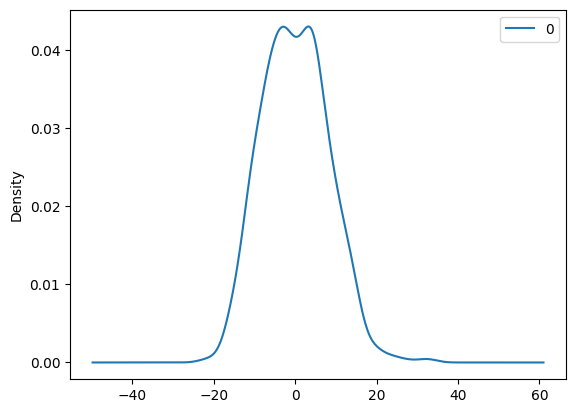

In [ ]:
residuals.plot(kind='kde')
pyplot.show()


**Remarks**: The bell curve of the residuals above resemble a symmetrical bell curve which is indicative or normal distribution, which is one of the most adapted in modeling [10]

[10] P. Bhandari, “Normal Distribution | Examples, Formulas, & Uses,” Scribbr, Oct. 23, 2020. https://www.scribbr.com/statistics/normal-distribution/ (accessed May 02, 2024).
‌

#### Summary of Residuals

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  792.000000
mean     0.033157
std      8.152946
min    -22.090284
25%     -5.966691
50%     -0.197062
75%      5.394914
max     33.300000


**Remarks**: The summary of the residuals are displayed above. As we can see the mean value is close to 0 and the values of the min and max do not differ that greatly.

### Improving the ARIMA Model

In this section, we will try to improve the ARIMA model by varying the baseline model order of (1, 1, 1).

#### Model Order = (1, 2, 3)

In [ ]:
model2 = ARIMA(series, order=(1,2,3))
model_fit2 = model2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


#### Model Order = (2, 4, 6)

In [ ]:
model3 = ARIMA(series, order=(2,4,6))
model_fit3 = model3.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Printing Model Summary

#### Model Order = (1, 2, 3)

In [ ]:
print(model_fit2.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 2, 3)   Log Likelihood               -2754.869
Date:                      Thu, 02 May 2024   AIC                           5519.738
Time:                              16:23:18   BIC                           5543.098
Sample:                          01-31-1907   HQIC                          5528.717
                               - 12-31-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4444      0.087      5.081      0.000       0.273       0.616
ma.L1         -0.9817      5.741     -0.171      0.864     -12.233      10.270
ma.L

**Remarks**: The summary of the `model_fit2` is shown above which is the model ARIMA(1, 2, 3).

##### Residuals Results

In [ ]:
residuals2 = DataFrame(model_fit2.resid)
print(residuals2.describe())

                0
count  792.000000
mean    -0.090790
std      8.004453
min    -22.389451
25%     -6.008093
50%     -0.240064
75%      5.441427
max     33.300000


**Remarks**: Modifying the values of the ARIMA model parameters changed the results of the residuals summary as seen above. The value of the mean became a bit farther from 0, this time, with a negative value. The min and max values remain almost the same.

#### Model Order = (2, 4, 6)

In [ ]:
print(model_fit3.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(2, 4, 6)   Log Likelihood               -2850.230
Date:                      Thu, 02 May 2024   AIC                           5718.461
Time:                              16:23:21   BIC                           5760.486
Sample:                          01-31-1907   HQIC                          5734.617
                               - 12-31-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9040      0.018   -108.761      0.000      -1.938      -1.870
ar.L2         -0.9958      0.017    -59.636      0.000      -1.029      -0.963
ma.L

**Remarks**: The summary of the `model_fit3` is shown above which is the model ARIMA(2, 4, 6).

##### Residuals Results

In [ ]:
residuals3 = DataFrame(model_fit3.resid)
print(residuals3.describe())

                0
count  792.000000
mean    -0.139578
std      9.536757
min    -60.551716
25%     -6.919672
50%     -0.210827
75%      6.031794
max     39.423200


**Remarks**: The results of the residuals summary drastically changed after modifying the ARIMA parameters, the mean became farther to zero, but still is a negative number. The gap between the min and max values widened, which is indicative of the presence of outliers.

### Making a Forecast (Steps = 10)

In this section we will be creating a function that will accept four parameters: the `data` itself, and the values for the ARIMA model, `p`, `q`, and `d`. This function will return the `forecast` variable.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
def make_forecast(data, p, q, d):
  # Splitting into train and test sets
  train_size = int(len(data) * 0.75)
  train_data, test_data = data[0:train_size], data[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1
  model = ARIMA(train_data, order = (p, q, d))
  results = model.fit()
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  forecast = results.predict(len(data), len(data)+10, typ = 'levels')

  return predictions, forecast

In [ ]:
predictions, forecast = make_forecast(series, 1, 1, 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
print("Forecast (Steps = 10)")
print(forecast)

Forecast (Steps = 10)
1973-01    80.89335
1973-02    80.89335
1973-03    80.89335
1973-04    80.89335
1973-05    80.89335
1973-06    80.89335
1973-07    80.89335
1973-08    80.89335
1973-09    80.89335
1973-10    80.89335
1973-11    80.89335
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  967.959884610114
RMSE:  31.112053686796603


**Remarks**: The baseline model, ARIMA(1, 1, 1) has shown high MSE and RMSE values from its evaluation, this indicates that the model is not performing well in predicting the values and present a huge difference between the actual and predicted values.

### Plotting the Forecast

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

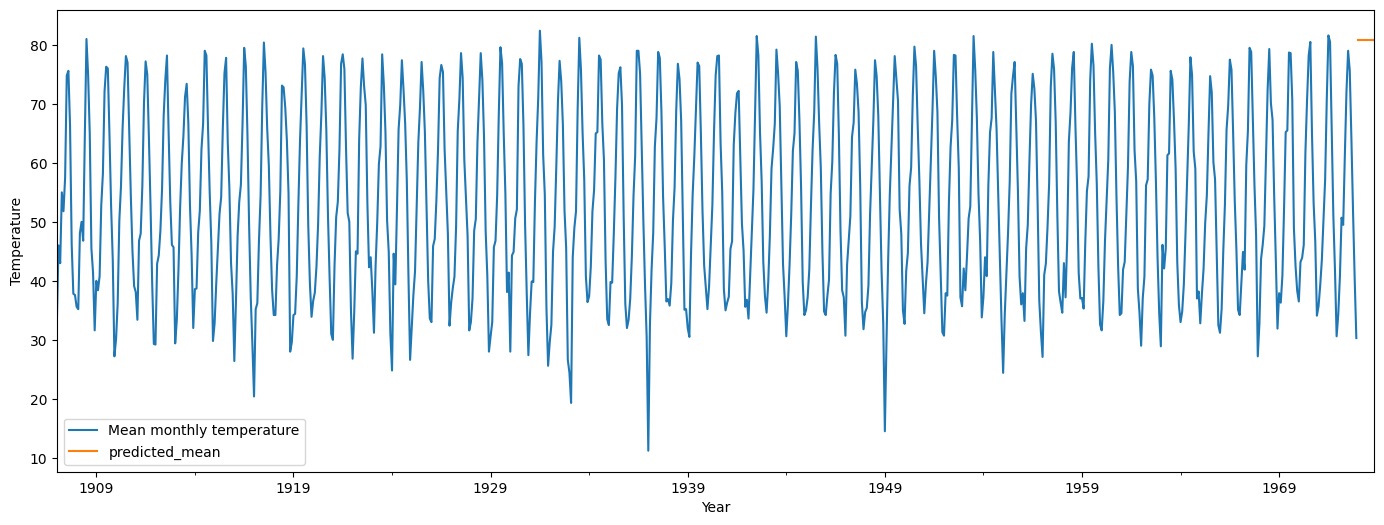

In [ ]:
ylabel='Temperature'
xlabel='Year'

ax = series.plot(legend=True,figsize=(17,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

**Remarks**: We have used the baseline model to perform the forecasting, as we can see in the resulting plot of the forecast, the forecasted values do not really fit the pattern that was set in the previous data points. Later on, we will be performing a grid search in order to find the best values for the baseline model order of the ARIMA model.

### Performing a Grid Search

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(series) * 0.75)
  train_data, test_data = series[0:train_size], series[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(series), len(series)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=244.680
ARIMA(0, 0, 1) MSE=243.522
ARIMA(0, 0, 2) MSE=241.414
ARIMA(0, 0, 3) MSE=240.950
ARIMA(0, 1, 0) MSE=495.038
ARIMA(0, 1, 1) MSE=563.035
ARIMA(0, 1, 2) MSE=762.177
ARIMA(0, 1, 3) MSE=241.417
ARIMA(0, 2, 0) MSE=1244065.976
ARIMA(0, 2, 1) MSE=1228064.280
ARIMA(0, 2, 2) MSE=1375959.214
ARIMA(0, 2, 3) MSE=1226.256
ARIMA(0, 3, 0) MSE=75530369.710
ARIMA(0, 3, 1) MSE=1146838.733
ARIMA(0, 3, 2) MSE=1228565.660
ARIMA(0, 3, 3) MSE=1377435.736
ARIMA(1, 0, 0) MSE=244.502
ARIMA(1, 0, 1) MSE=242.878
ARIMA(1, 0, 2) MSE=242.032
ARIMA(1, 0, 3) MSE=241.498
ARIMA(1, 1, 0) MSE=927.784
ARIMA(1, 1, 1) MSE=967.960
ARIMA(1, 1, 2) MSE=242.927
ARIMA(1, 1, 3) MSE=242.089
ARIMA(1, 2, 0) MSE=1304343.983
ARIMA(1, 2, 1) MSE=1337791.293
ARIMA(1, 2, 2) MSE=1669.403
ARIMA(1, 2, 3) MSE=1745.212
ARIMA(1, 3, 0) MSE=348687748.241
ARIMA(1, 3, 1) MSE=1318901.869
ARIMA(1, 3, 2) MSE=1359081.389
ARIMA(1, 3, 3) MSE=1237604.102
ARIMA(2, 0, 0) MSE=235.314
ARIMA(2, 0, 1) MSE=184.648
ARIMA(2, 0, 2) MSE=16.30

**Remarks**: Based on the result of the grid search above, the best values for the ARIMA model that will be used on the given dataset are 3, 0, 3.

#### Trying the (3, 0, 3) values for the ARIMA model.

In [ ]:
predictions2, forecast2 = make_forecast(series, 3, 0, 3)

In [ ]:
print("Forecast (Steps = 10)")
print(forecast2)

Forecast (Steps = 10)
1973-01    32.790219
1973-02    34.944437
1973-03    42.067584
1973-04    52.259953
1973-05    62.779879
1973-06    70.817512
1973-07    74.209661
1973-08    72.056988
1973-09    64.928021
1973-10    54.742817
1973-11    44.222666
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

print("MSE: ", mean_squared_error(test_data, predictions2))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions2)))

MSE:  15.662469948959755
RMSE:  3.9575838524230607


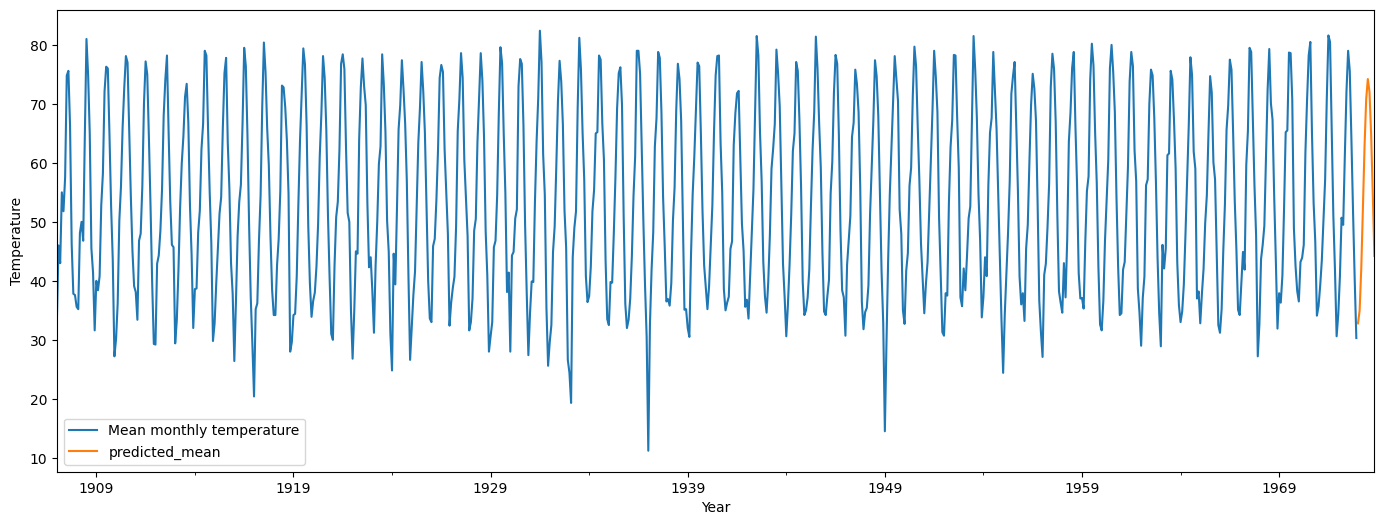

In [ ]:
ylabel='Temperature'
xlabel='Year'

ax = series.plot(legend=True,figsize=(17,6))
forecast2.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

**Remarks**: With the new values of the ARIMA model, we can see that the plot of the forecasted values (in orange) fit the trend of the graph better. A side-by-side comparison is shown in the image below to clearly see the difference.

#### Side-by-Side Comparison

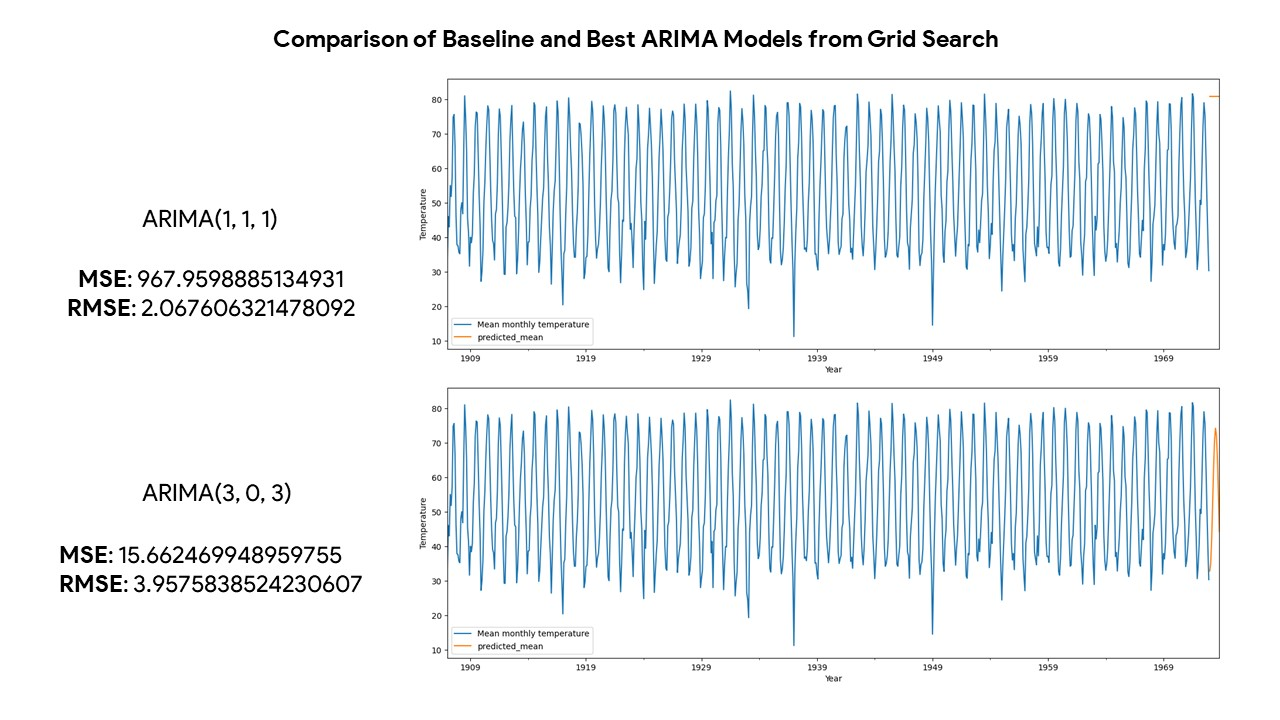

**Remarks**: Based on the comparison above, similar to what we have obtained in the procedure section of the activity, we can observe lower MSE and RMSE values in the best ARIMA model obtained from the grid search performed prior compared to the baseline ARIMA model. We can also clearly see that the predicted values of the best ARIMA model fit the pattern of the time-series data better.

### Conclusions and Lessons Learned

In this activity, the application and creation and fitting of an ARIMA model to a time-series dataset. Based on the series of steps done in this hands-on activity, I have concluded and learned the following points:

* Time-series datasets require some special parsing or additional steps in reading the data as the dates themselves may be differently formatted.
* It is important to check the dataset itself for missing values as this result to producing unwanted errors and results.
* Visualization techniques such as graphs and plots tell us greatly about the performance of the model, it is just a matter of researching on how to interpret them correctly.
* ARIMA models have built-in evaluation methods which are powerful in the optimization of the model more efficiently.